# Course: Deep Learning
# Author: Sandro Camargo sandrocamargo@unipampa.edu.br
# MNIST Classification with $\ell_2$ Regularization
# Dataset: '/content/sample_data/' mnist
# Dataset description: https://www.tensorflow.org/datasets/catalog/mnist


Loading libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras import layers, models, optimizers, losses, metrics

Defining image parameters

In [ ]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

Loading dataset from google colab

In [ ]:
data_path = "/content/sample_data/"
train_data = np.loadtxt(data_path + "mnist_train_small.csv", delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",") 

Scaling the inputs in [0,1] range and presenting the input and output dataset dimensions

In [ ]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

Splitting inputs and outputs
Binarizing outputs


In [ ]:
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])
print('The training dataset (input) dimensions are: ', train_imgs.shape)
print('The training dataset (output) dimensions are: ', train_labels.shape)
print('The testing dataset (input) dimensions are: ', test_imgs.shape)
print('The testing dataset (output) dimensions are: ',test_labels.shape)

train_labels_bin = label_binarize(train_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The training dataset (input) dimensions are:  (20000, 784)
The training dataset (output) dimensions are:  (20000, 1)
The testing dataset (input) dimensions are:  (10000, 784)
The testing dataset (output) dimensions are:  (10000, 1)


Inspecting the training set

Showing the first 20 samples and their labels

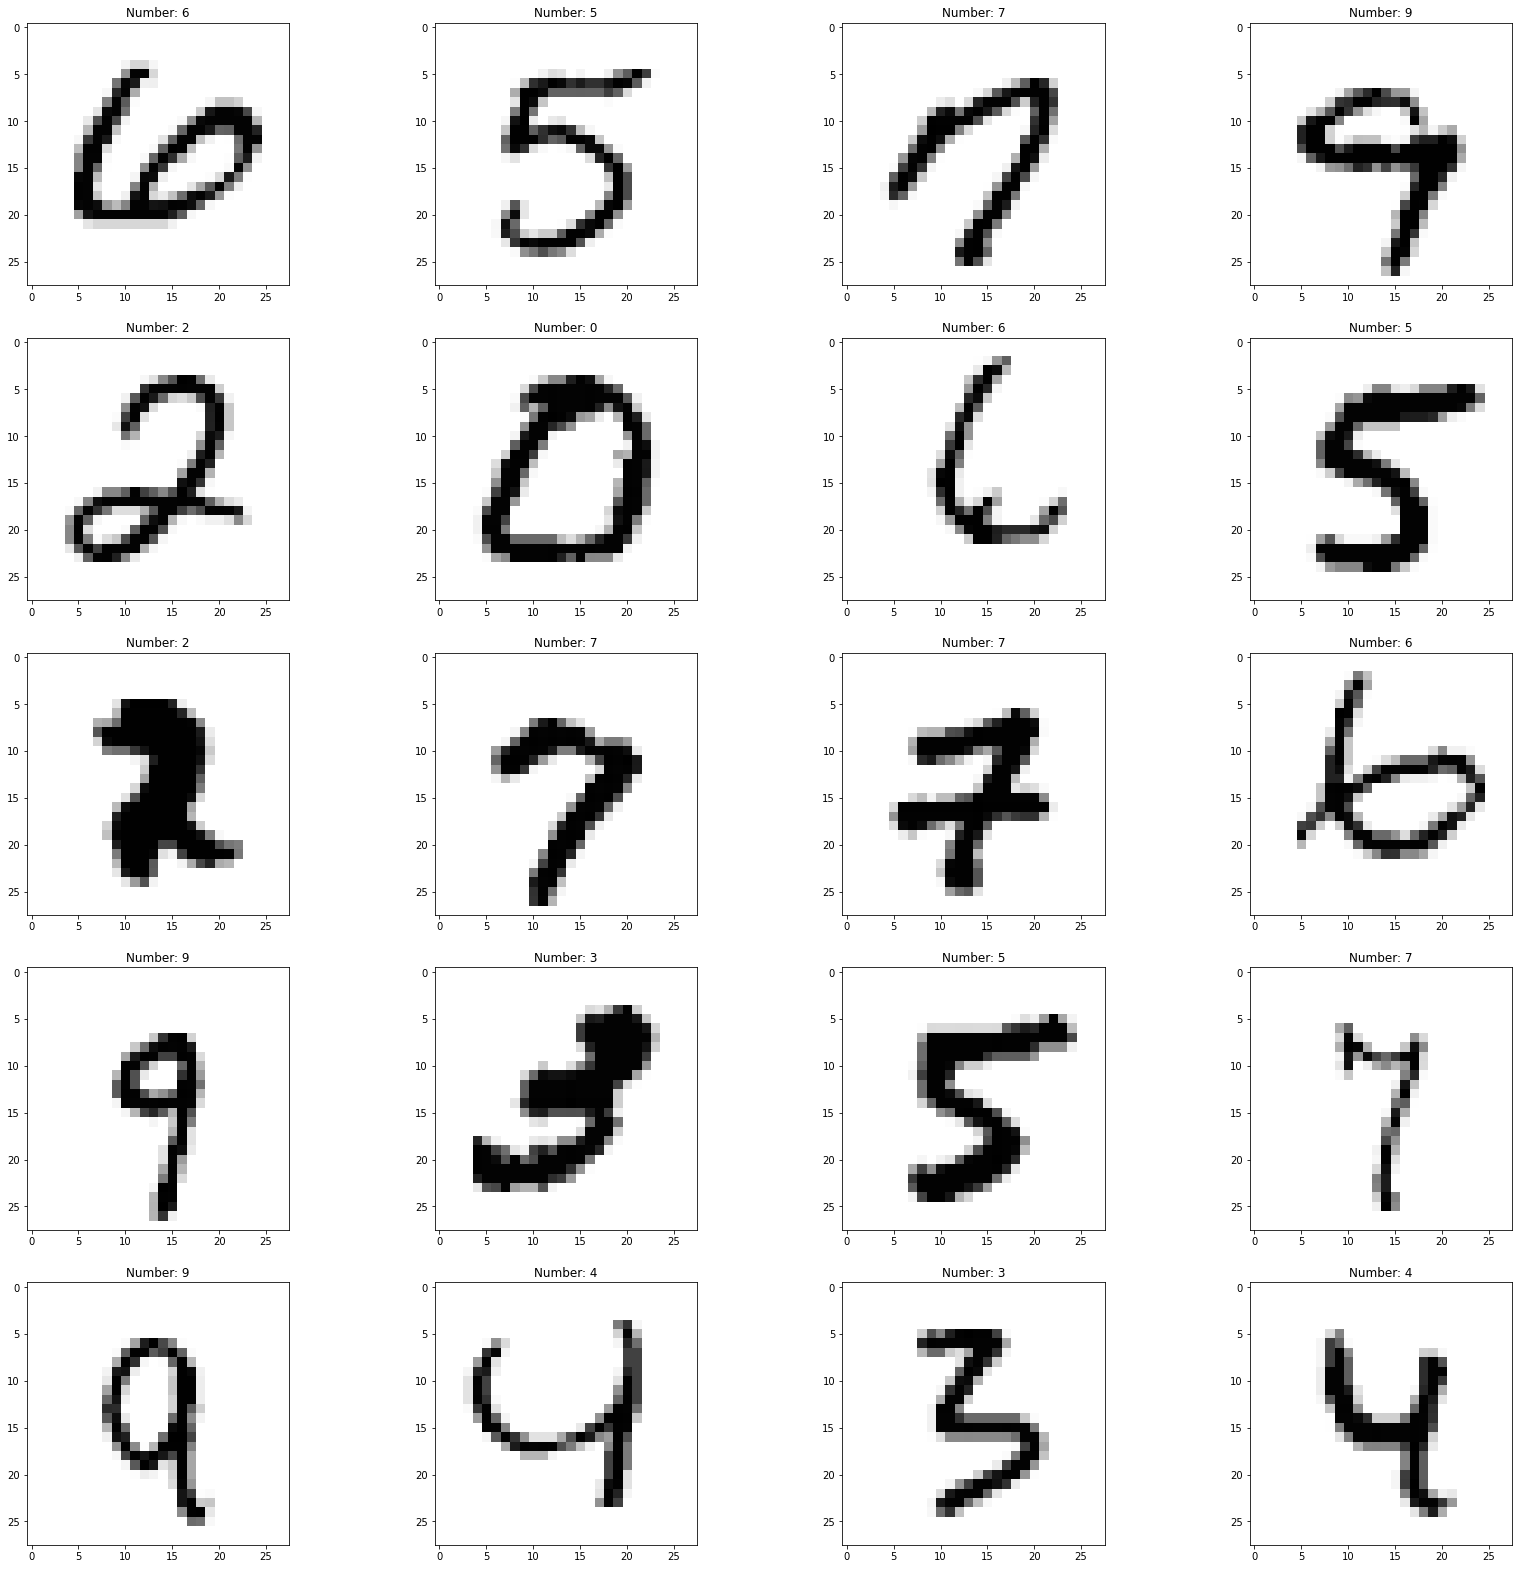

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(28, 28))

for i in range(5):
  for j in range(4):
    img = train_data[i*5+j,range(1,785)].reshape((28,28))
    ax[i,j].imshow(img, cmap="Greys")
    ax[i,j].title.set_text("Number: " + str(int(train_data[i*5+j,0])))
plt.show()

Creating and training the model


In [ ]:
EPOCHS = 500

# L2 Regularization
reg = tf.keras.regularizers.l2(l2 = 1e-7)

model = models.Sequential([
  layers.Flatten(input_shape=[image_pixels]),
  layers.Dense(128, activation='relu',kernel_regularizer = reg),
  layers.Dense(10)
])

model.compile(
    optimizer=optimizers.Adam(0.001),
    loss=losses.CategoricalCrossentropy(from_logits=True),
    metrics=[metrics.CategoricalAccuracy()],
)

model.summary()

history = model.fit(
    train_imgs, train_labels_bin, 
    epochs=EPOCHS, verbose=1,
    validation_split=0.2
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
500/500 [==============================] - 2s 4ms/step - loss: 2.1997 - categorical_accuracy: 0.8229 - val_loss: 0.8680 - val_categorical_accuracy: 0.8537
Epoch 2/500
500/500 [==============================] - 2s 4ms/step - loss: 0.8227 - categorical_accuracy: 0.8564 - val_loss: 0.8079 - val_categoric

Plotting the loss function on training and validation set.

The best value for epochs is when the validation loss starts to increase.

---



Training Loss:  0.3721
Validation Loss:  0.4527


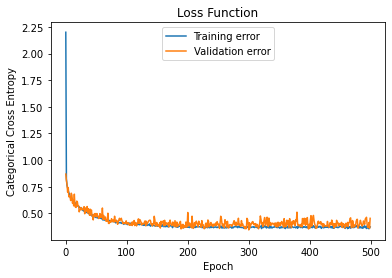

In [ ]:
plt.plot(history.history['loss'], label='Training error')
plt.plot(history.history['val_loss'], label='Validation error')
plt.title('Loss Function')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc='upper center')
plt.savefig("mlp-regul-trainingerror.pdf")
print("Training Loss: ", round(history.history['loss'][-1],4))
print("Validation Loss: ", round(history.history['val_loss'][-1],4))
plt.show()

Plotting the classification accuracy on training and validation sets

Categorical Accuracy:  0.9319
Validation Categorical Accuracy:  0.9172


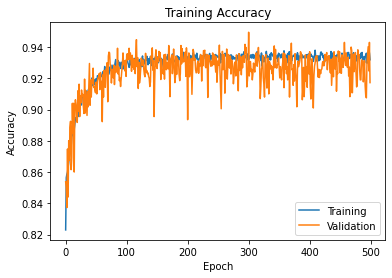

In [ ]:
plt.plot(history.history['categorical_accuracy'], label='Training')
plt.plot(history.history['val_categorical_accuracy'], label='Validation')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.savefig("mlp-regul-trainingaccuracy.pdf")
print("Categorical Accuracy: ", round(history.history['categorical_accuracy'][-1],4))
print("Validation Categorical Accuracy: ", round(history.history['val_categorical_accuracy'][-1],4))
plt.show()

Evaluates performance on test set
Presents the classification accuracy

In [ ]:
scores = model.evaluate(
    test_imgs, test_labels_bin, verbose=1
)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4563 - categorical_accuracy: 0.9078
categorical_accuracy: 90.78%


Summarizing the performance on training set


In [ ]:
test_predictions = model.predict(test_imgs)
print(confusion_matrix(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1)))
print(classification_report(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1), target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

313/313 [==============================] - 1s 2ms/step
[[ 923    0    4    0    0    6    6    1    2    1]
 [   0 1105   11    0    0    1    3   17    0    2]
 [  14    3  874    9    2    3    5   11    3    2]
 [   3    5   78  951    0   35    0   20   78   21]
 [  10    1   22    2  921    6   38   10   12   36]
 [  11    1    3   18    0  815   10    0   12    4]
 [   4    0    6    0    3    8  876    0    2    0]
 [   3    1   14    4    1    1    0  858    2    2]
 [   7   19   16    7    1   10   20    2  818    4]
 [   5    0    4   19   54    7    0  109   45  937]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       943
           1       0.97      0.97      0.97      1139
           2       0.85      0.94      0.89       926
           3       0.94      0.80      0.86      1191
           4       0.94      0.87      0.90      1058
           5       0.91      0.93      0.92       874
           6       0.91      0.97  

Confusion Matrix Heatmap

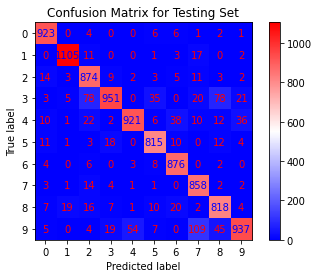

In [ ]:
cm = confusion_matrix(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
disp.plot(cmap="bwr")
plt.title('Confusion Matrix for Testing Set')
plt.savefig("confusionmatrix.pdf")
plt.show()

Reporting some misclassified samples 

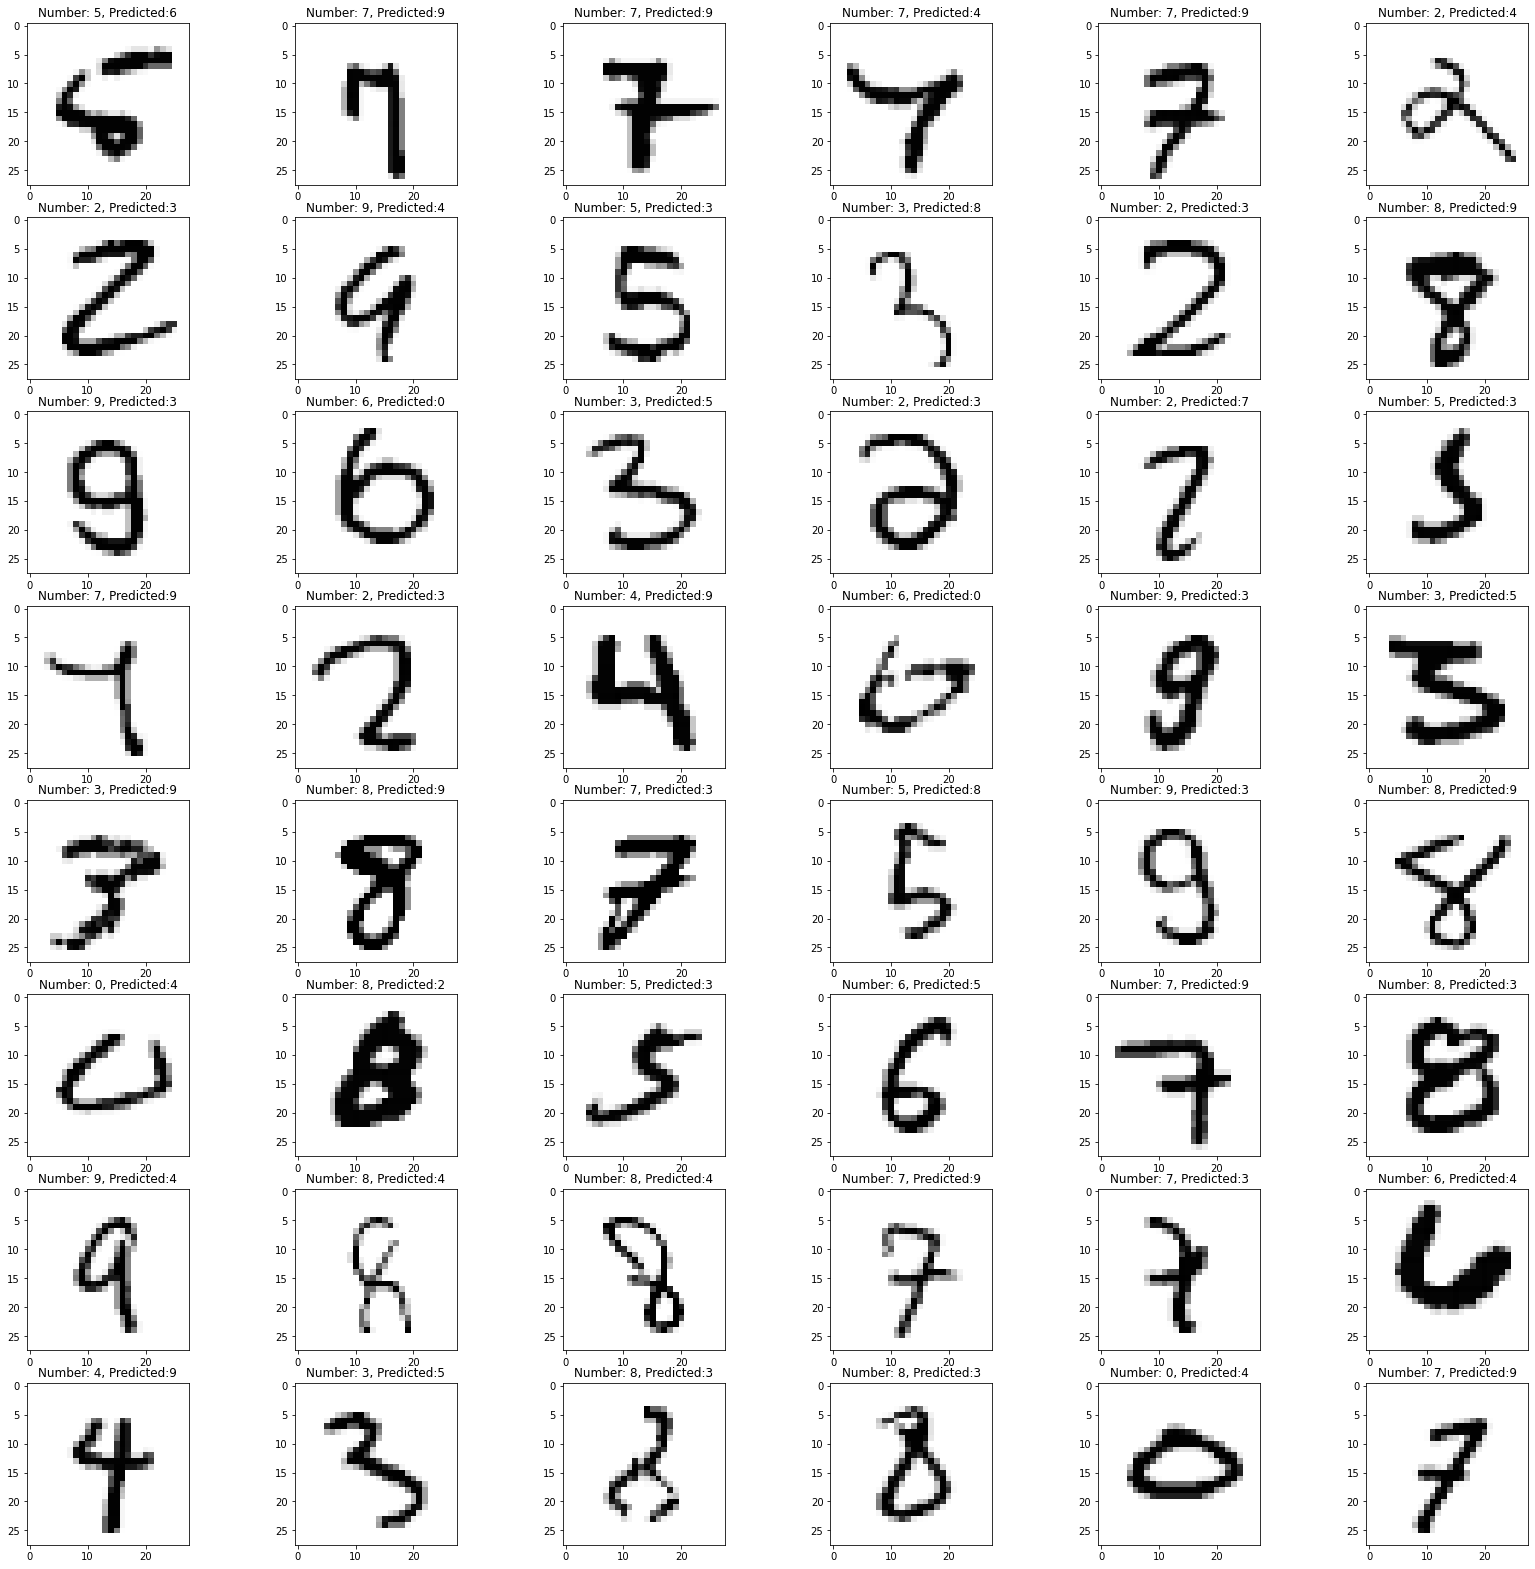

In [ ]:
i = 0
j = -1

fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(28, 28))

for k in range(5000):
  if test_predictions.argmax(axis=1)[k]!=test_labels_bin.argmax(axis=1)[k]:
      if i==8:
         break
      j = j + 1
      img = test_data[k,range(1,785)].reshape((28,28))
      ax[i,j].imshow(img, cmap="Greys")
      ax[i,j].title.set_text("Number: " + str(int(test_data[k,0])) + ", Predicted:" + str(test_predictions.argmax(axis=1)[k]))
      if j>4:
         j = -1
         i = i + 1
plt.show()

[<keras.layers.reshaping.flatten.Flatten object at 0x7f9be645a310>, <keras.layers.core.dense.Dense object at 0x7f9bfc6a60d0>, <keras.layers.core.dense.Dense object at 0x7f9bf11733d0>]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


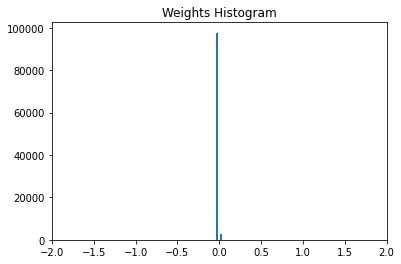

In [ ]:
w = list()
print(model.layers)
for layer in model.layers[1:-1]:
    weights = layer.get_weights() # list of numpy arrays
    for x in weights: 
      w.append(x) 
plt.hist(w, bins=50)
plt.xlim((-2,2))
plt.title("Weights Histogram")
plt.savefig("mlp-regul-weights.pdf")